In [1]:
import pandas as pd
import numpy as np

In [2]:
da=pd.read_csv('d-bhp0206.txt',delim_whitespace=True)
da1=pd.read_csv('d-vale0206.txt',delim_whitespace=True)

In [3]:
x_t = np.log(np.matrix([da.adjclose, da1.adjclose]))

In [4]:
x_t[:,0:10]

matrix([[ 2.12704052,  2.12823171,  2.14476101,  2.17133681,  2.18154676,
          2.2104698 ,  2.16102153,  2.14826773,  2.13060983,  2.2752139 ],
        [ 0.63657683,  0.63127178,  0.65232519,  0.64185389,  0.63127178,
          0.64185389,  0.63127178,  0.63127178,  0.63657683,  0.63657683]])

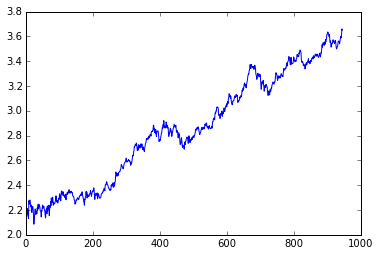

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.asarray(x_t[0,:])[0])

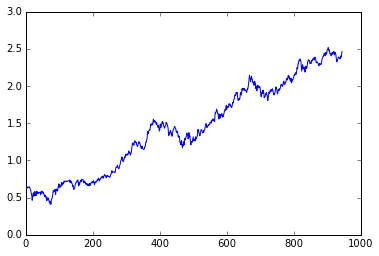

In [6]:
plt.plot(np.asarray(x_t[1,:])[0])

In [7]:
dx_t = np.diff(x_t)
Z_0t = dx_t[:,1:]  # dx_t
Z_1t = x_t[:,1:-1] # x_t-1
T = max(Z_0t.shape)
Z_2t = np.concatenate((np.ones((1,T)),dx_t[:,:-1])) # dx_t-1
print x_t[1,0:3], Z_0t[1,0], Z_1t[1,0], Z_2t[2,0]

[[ 0.63657683  0.63127178  0.65232519]] 0.0210534091978 0.631271776842 -0.00530505222969


In [8]:
M_00 = (Z_0t * Z_0t.T) / T;
M_01 = (Z_0t * Z_1t.T) / T;
M_02 = (Z_0t * Z_2t.T) / T;
M_11 = (Z_1t * Z_1t.T) / T;
M_12 = (Z_1t * Z_2t.T) / T;
M_22 = (Z_2t * Z_2t.T) / T;
M_21 = M_12.T;
M_20 = M_02.T;
M_10 = M_01.T;

In [9]:
from numpy.linalg import inv,eig,cholesky
from math import sqrt


In [10]:
S_11 = M_11 - M_12*inv(M_22)*M_21;
S_10 = M_10 - M_12*inv(M_22)*M_20;
S_00 = M_00 - M_02*inv(M_22)*M_20;
S_01 = M_01 - M_02*inv(M_22)*M_21;
L = cholesky(S_11)

In [11]:
v,w =  eig(inv(L)*S_10*inv(S_00)*S_01*inv(L.T));

In [12]:
v

array([  1.01517001e-05,   4.06019854e-02])

In [13]:
w

matrix([[-0.99701474,  0.07721144],
        [-0.07721144, -0.99701474]])

In [14]:
W = inv(L.T)*w
const = W.max(axis=0)
W = np.divide(W,const)
W

matrix([[ 1.        ,  1.        ],
        [ 2.66801941, -0.71778405]])

In [15]:
res = W[::,1].T * x_t

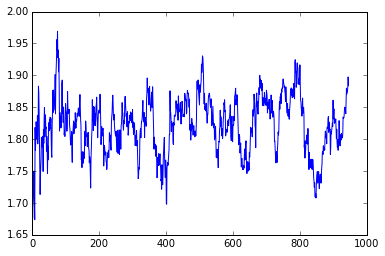

In [16]:
plt.plot(np.asarray(res)[0])